# Part II - Communicate findings from Prosper Loan Data
## by Doriane Ishimwe Ntaganda

## Investigation Overview


> Using exploratory and explanatory data analysis, the goal of this project is to communicate findings from loan data at prosper.

## Dataset Overview

> This project will explore the factors considered when giving loans at Prosper Marketplace Inc. a company that provides loans to borrowers. The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Based on the mentioned variables a loan can be granted or denied.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ProsperLoanData.csv')

In [5]:
#choose the columns to be used
cols_tobeused = ['LoanOriginationDate', 'Recommendations', 'Investors','ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)','BorrowerState','EmploymentStatus',
    'IsBorrowerHomeowner','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'LoanOriginalAmount','ListingCreationDate','Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate','EstimatedReturn']
df_cols_tobeused = df[cols_tobeused]

In [6]:
#cleaning datatype from object into datetime datatype
df_cols_tobeused['LoanOriginationDate'] = pd.to_datetime(df_cols_tobeused['LoanOriginationDate'])
df_cols_tobeused['ListingCreationDate'] = pd.to_datetime(df_cols_tobeused['ListingCreationDate'])
df_cols_tobeused['ProsperScore'] = df_cols_tobeused['ProsperScore'].astype('category')

## Relationship between Loan Status and Terms

> This Chat decipts the loan status in accordance to terms.Those in current category outweighs others and Also in all status of loan, few people take a loan of one year while a high number prefer 3 years which is term 36

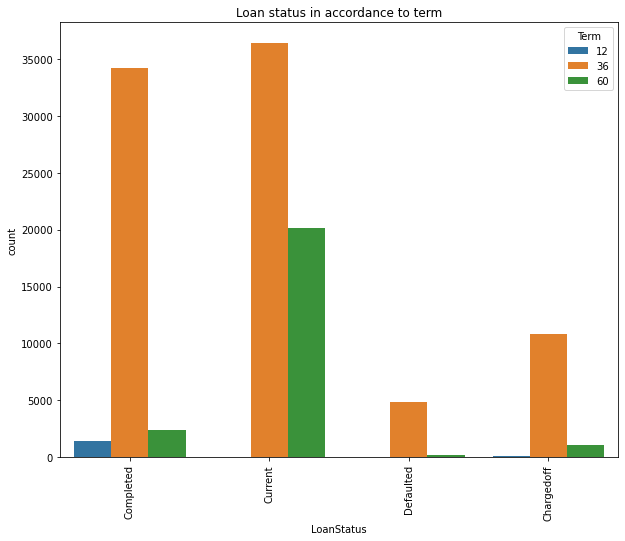

In [6]:
loan_df = df_cols_tobeused[df_cols_tobeused['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])]
plt.figure(figsize=(10,8))
sb.countplot(data=loan_df ,x='LoanStatus', hue='Term')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loan status in accordance to term")
plt.xticks(rotation=90);

## Relationship among Loan Status, Home owner and Prosper Rating

> In both those who own their home and those who don’t, current category has a higher number of people, Secondly B category has the highest count of rating in those who rent whereas in those who own their number, it is HR

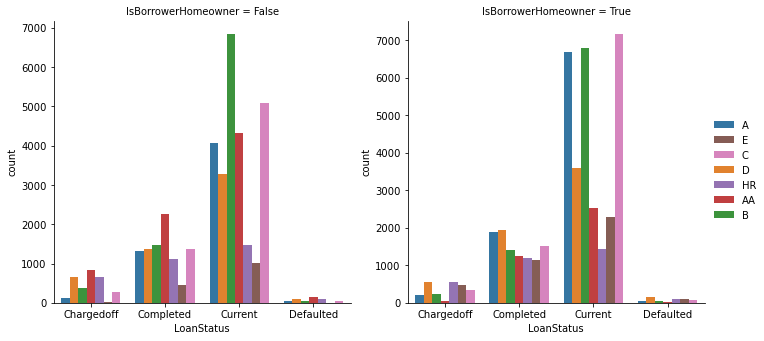

In [23]:
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)
    
g = sb.FacetGrid(loan_df, col='IsBorrowerHomeowner',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='ProsperRating (Alpha)', alpha=.99,
palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

## Number of obeservation according to Employment status

> 67322 people who got a loan are from Employed category which contains more people compared to the rest of categories


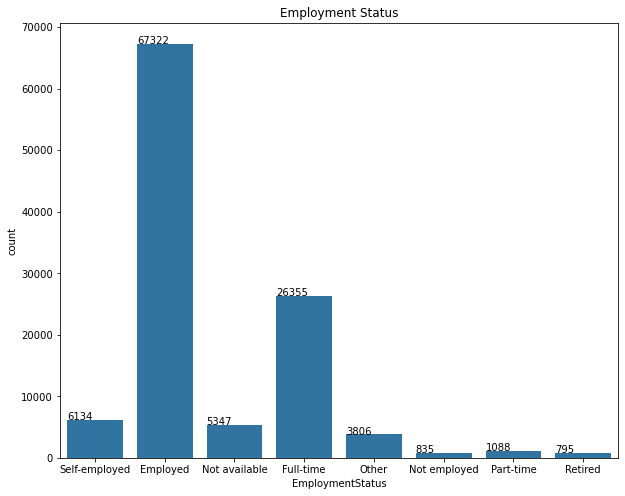

In [8]:
plt.figure(figsize=(10,8))
ax = sb.countplot(data=df_cols_tobeused,x='EmploymentStatus',color=sb.color_palette()[0])
plt.title("Employment Status")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 